# Machine Learning Lab HW 4
# Connor O'Keefe
# 02/02/2024

# HR ATTRIBUTION

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [2]:
# attrition is referring to us predicting whether employees leave or not

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [3]:
df = pd.read_csv("HR_Analytics.csv")
df # Attrition = Yes, person left company

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [5]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

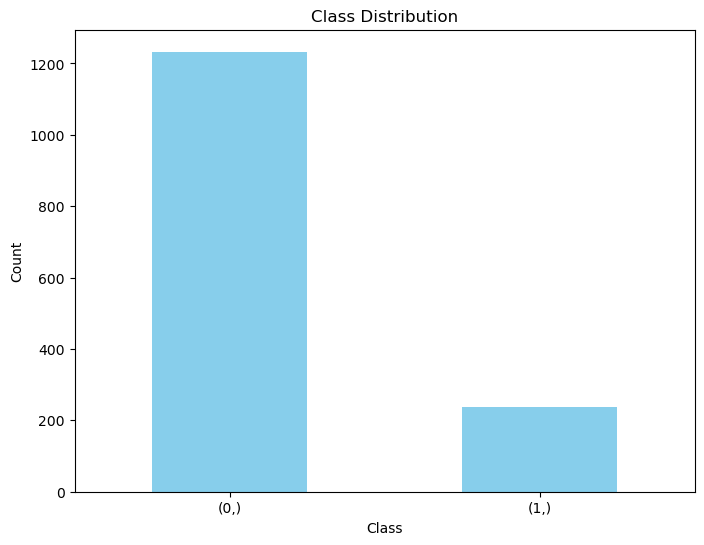

In [6]:
class_counts = y.value_counts()

plt.figure(figsize = (8, 6))
class_counts.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation = 0)  # Remove rotation of x-axis labels
plt.show()

In [7]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns = string_columns, prefix = string_columns, drop_first = True) # drop_first removes duplicate yes/no column

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 2.) Using the default Decision Tree. What is the IN/Out of Sample accuracy?

In [9]:
clf = DecisionTreeClassifier() # basic
clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY: " , round(acc,2))
# reducing in sample accuracy increases out of sample accuracy

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY:  0.8


# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [10]:
# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state = 42)

scoring = make_scorer(f1_score, average = 'weighted') # want best f1 score from cvs of decision trees

grid_search = GridSearchCV(estimator=dt_classifier, param_grid = param_grid, scoring = scoring, cv = 5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [11]:
clf = tree.DecisionTreeClassifier(**best_params, random_state = 42) # our best performing model from training data
clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print("IN SAMPLE ACCURACY : ", round(acc, 2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : ", round(acc, 2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot ......

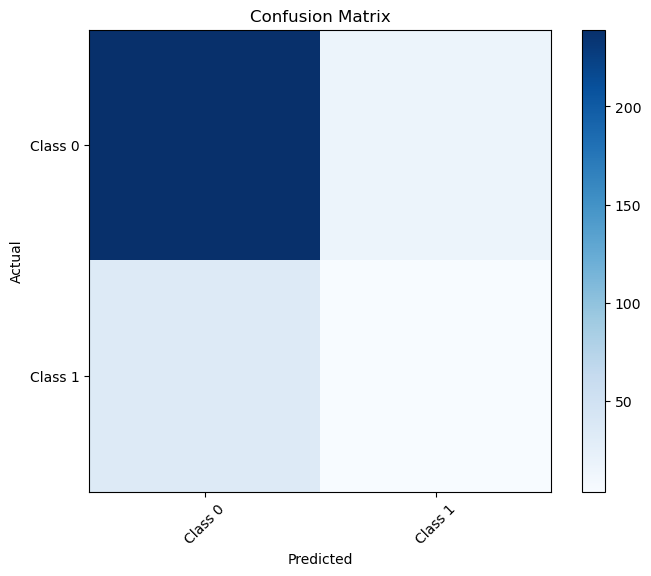

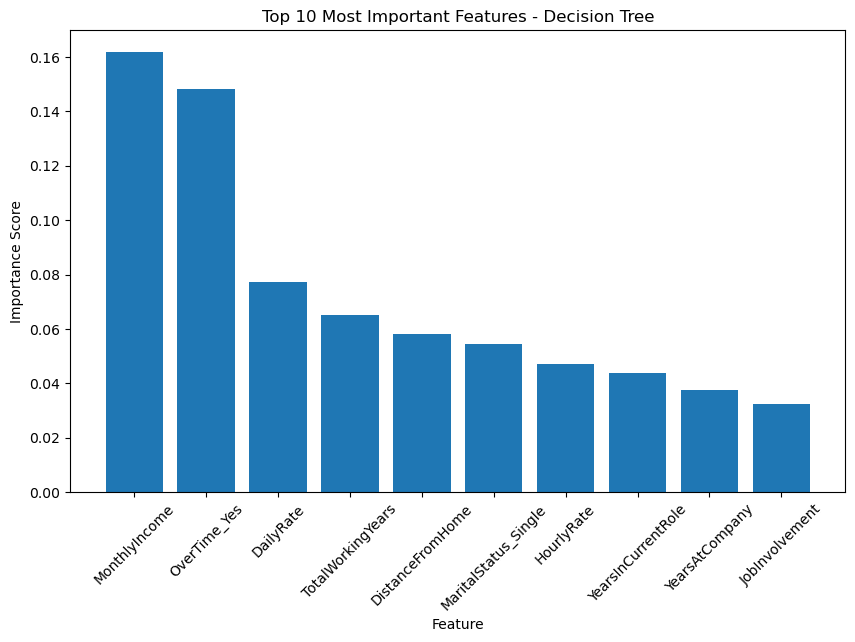

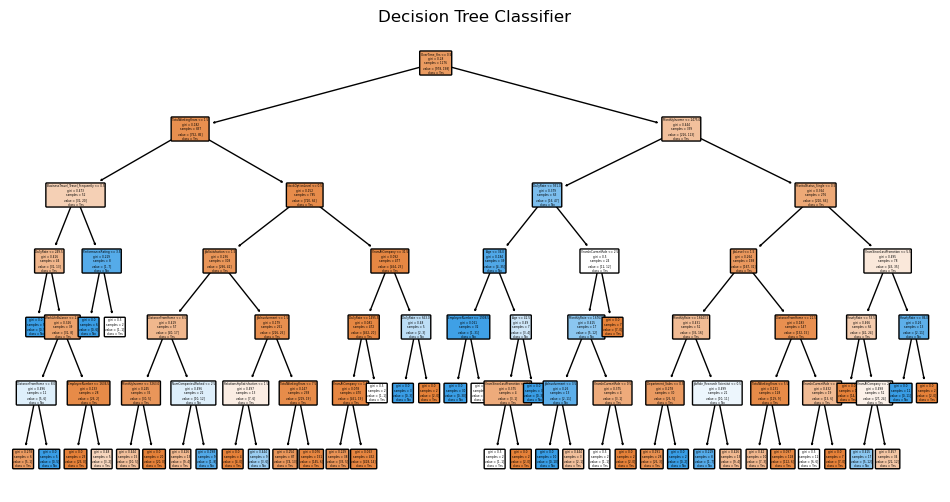

In [27]:
# Make predictions on the test data
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize = (8, 6))
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation = 45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importance = clf.feature_importances_

# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n]
top_feature_names = X.columns[top_feature_indices]
top_feature_importance = feature_importance[top_feature_indices]

# Plot the top 10 most important features
plt.figure(figsize = (10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree')
plt.xticks(rotation = 45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
# bluer, the lower the gini coefficient
plot_tree(clf, filled = True, feature_names = list(X.columns), class_names = ["Yes", "No"], rounded = True, fontsize = 2)
plt.title('Decision Tree Classifier')
plt.show()

# 5.) Looking at the graphs, what would be your suggestions to try to improve employee retention? What additional information would you need for a better plan? Plot anything you think would assist in your assessment.

In [24]:
np.corrcoef(np.array(X['OverTime_Yes']), np.array(y['Attrition']))
# the more overtime someone works, the more likely they are to leave

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

## ANSWER: 
### Because monthly income and overtime pay are by far the most important features, I would advise the company to maximize salaries and keep overtime hours for employees. 

# 6.) Using the training data, if they made everyone stop working overtime, what would have been the expected difference in employee retention?

In [28]:
x_train_experiment = x_train.copy()

In [29]:
x_train_experiment['OverTime_Yes'] = 0

In [31]:
y_pred_experiment = clf.predict(x_train_experiment)
y_pred = clf.predict(x_train)

In [66]:
saved = sum(y_pred - y_pred_experiment)
print('Stopping overtime work would have prevented',saved,'people from leaving.')
print('See below analysis for the change in retention rate and financial calculations.')
# the below number is the number of people we would've saved from leaving

Stopping overtime work would have prevented 23 people from leaving.
See below analysis for the change in retention rate and financial calculations.


# 7.) If the company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [35]:
x_train_experiment['Y'] = y_pred
x_train_experiment['Y_exp'] = y_pred_experiment
x_train_experiment['Ret_Change'] = x_train_experiment['Y'] - x_train_experiment['Y_exp']

In [43]:
# getting savings from lost employees
# same as the change in training costs
savings = sum(x_train_experiment['Ret_Change']*2.8*x_train_experiment['MonthlyIncome'])
savings

560406.0000000002

In [44]:
# cost of lost overtime
cost = 2000*len(x_train[x_train['OverTime_Yes'] == 1])
cost

678000

In [45]:
# profit
profit = savings - cost
print('Profit from this experiment: ', profit)

Profit from this experiment:  -117593.99999999977


## ANSWER : 
### We saved 59 people from leaving, but the cost of overtime was -$2000 per person. Because of this, the company should just keep overtime. It might not be the most morally efficient option, but this analysis will not consider that.

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [47]:
raise_amount = 500

In [70]:
profits = []
for raise_amount in range(-50000, 1000, 100):
    x_train_experiment = x_train.copy()
    x_train_experiment['MonthlyIncome'] = x_train_experiment['MonthlyIncome'] + raise_amount
    y_pred_experiment = clf.predict(x_train_experiment)
    y_pred = clf.predict(x_train)
    x_train_experiment['Y'] = y_pred
    x_train_experiment['Y_exp'] = y_pred_experiment
    x_train_experiment['Ret_Change'] = x_train_experiment['Y'] - x_train_experiment['Y_exp']

    # getting savings from lost employees
    # same as the change in training costs
    savings = sum(x_train_experiment['Ret_Change']*2.8*x_train_experiment['MonthlyIncome'])
    savings

    # cost of lost overtime
    cost = raise_amount*len(x_train)

    # profit
    profit = savings - cost
    #print('The profit now is: ', profit)
    profits.append(profit)

    # retention difference
    #print('The retention difference is: ', sum(x_train_experiment['Y'] - x_train_experiment['Y_exp']))
    # saved 22 people from leabing by giving everyone $500

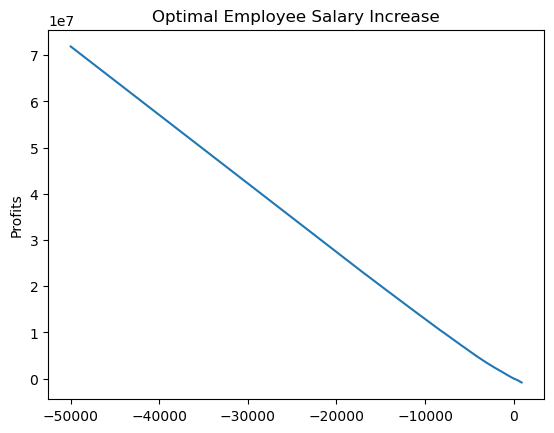

I dramatically decreased the negative direction of the x-axis to illustrate the below point. From the execution of the above for loop, the retention rate stops decreasing at -110 employees, which is clearly flawed because there are over 1400 workers in the data sample.


In [79]:
plt.plot(range(-50000, 1000, 100), profits)
plt.title('Optimal Employee Salary Increase')
plt.ylabel('Profits')
plt.show()
print('I dramatically decreased the negative direction of the x-axis to illustrate the below point. \
From the execution of the above for loop, the retention rate stops decreasing at -110 employees, which is \
clearly flawed because there are over 1400 workers in the data sample.')

## ANSWER:
### Because we do not know each employee's salary, we can assume that the company pays their employees realistic salaries. As discussed in class, there is a limit to applying economic theory. Because this analysis clearly did not consider all the employees quitting when their salaries were decreased, the company should tread lightly. I think they should probably just keep salaries the same without the raise and run more experiments to evaluate how happy their customers are.